In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
 df=pd.read_csv('/content/creditcard.csv')

In [ ]:
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
92615,64013.0,1.065436,0.011466,-0.275769,0.936817,0.536612,0.437447,0.293841,-0.051478,-0.123570,-0.080753,-1.225528,0.378706,1.234072,0.138968,1.155445,0.256856,-0.733191,-0.428801,-0.204810,0.165330,-0.159968,-0.625702,-0.207422,-1.321135,0.570949,-0.435489,0.016811,0.030772,118.90,0
81991,59196.0,-5.377264,-1.628835,0.267019,-1.987615,-0.689836,-0.222598,-0.940845,1.127167,1.431902,-1.521762,1.259223,1.666648,0.049318,0.327288,0.674717,0.086399,0.191046,-0.195314,-0.218454,-2.544792,-0.200384,1.135451,0.895233,-0.146185,0.771002,0.043798,-0.791310,0.055086,61.00,0
256293,157626.0,2.070681,-0.359560,-1.220081,0.175873,-0.113232,-0.530421,-0.240215,-0.058818,1.027827,0.106618,-1.410861,-0.753869,-1.650533,0.465635,0.482732,0.224220,-0.388274,-0.141296,0.112484,-0.272170,-0.072617,-0.177960,0.223066,0.467039,-0.204065,0.543967,-0.085355,-0.059744,10.00,0
26103,33910.0,0.757942,-2.265244,0.134769,-1.014410,-2.103809,-0.883880,-0.520974,-0.243758,-1.692284,1.271406,-0.608387,-1.460711,-0.658398,0.022009,0.844248,-0.160255,0.554218,-0.008647,-0.270145,0.385463,-0.233270,-1.276673,-0.114061,0.315364,-0.065432,-0.517851,-0.045985,0.093346,402.00,0
41367,40652.0,1.316633,-1.483103,0.931747,-1.238572,-1.651060,0.468585,-1.488946,0.115874,-1.177206,1.144348,-0.955579,-0.145109,1.647032,-1.174010,-0.056308,-0.662875,0.749217,-0.347508,-0.266349,-0.141622,-0.196106,-0.054685,-0.043415,-0.429414,0.259901,-0.143548,0.089338,0.038037,81.09,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

## Data Preprocessing

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Exploratory Data Analysis

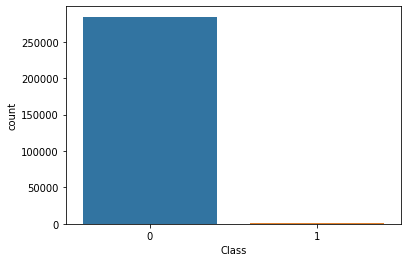

In [ ]:
sns.countplot(df['Class'])

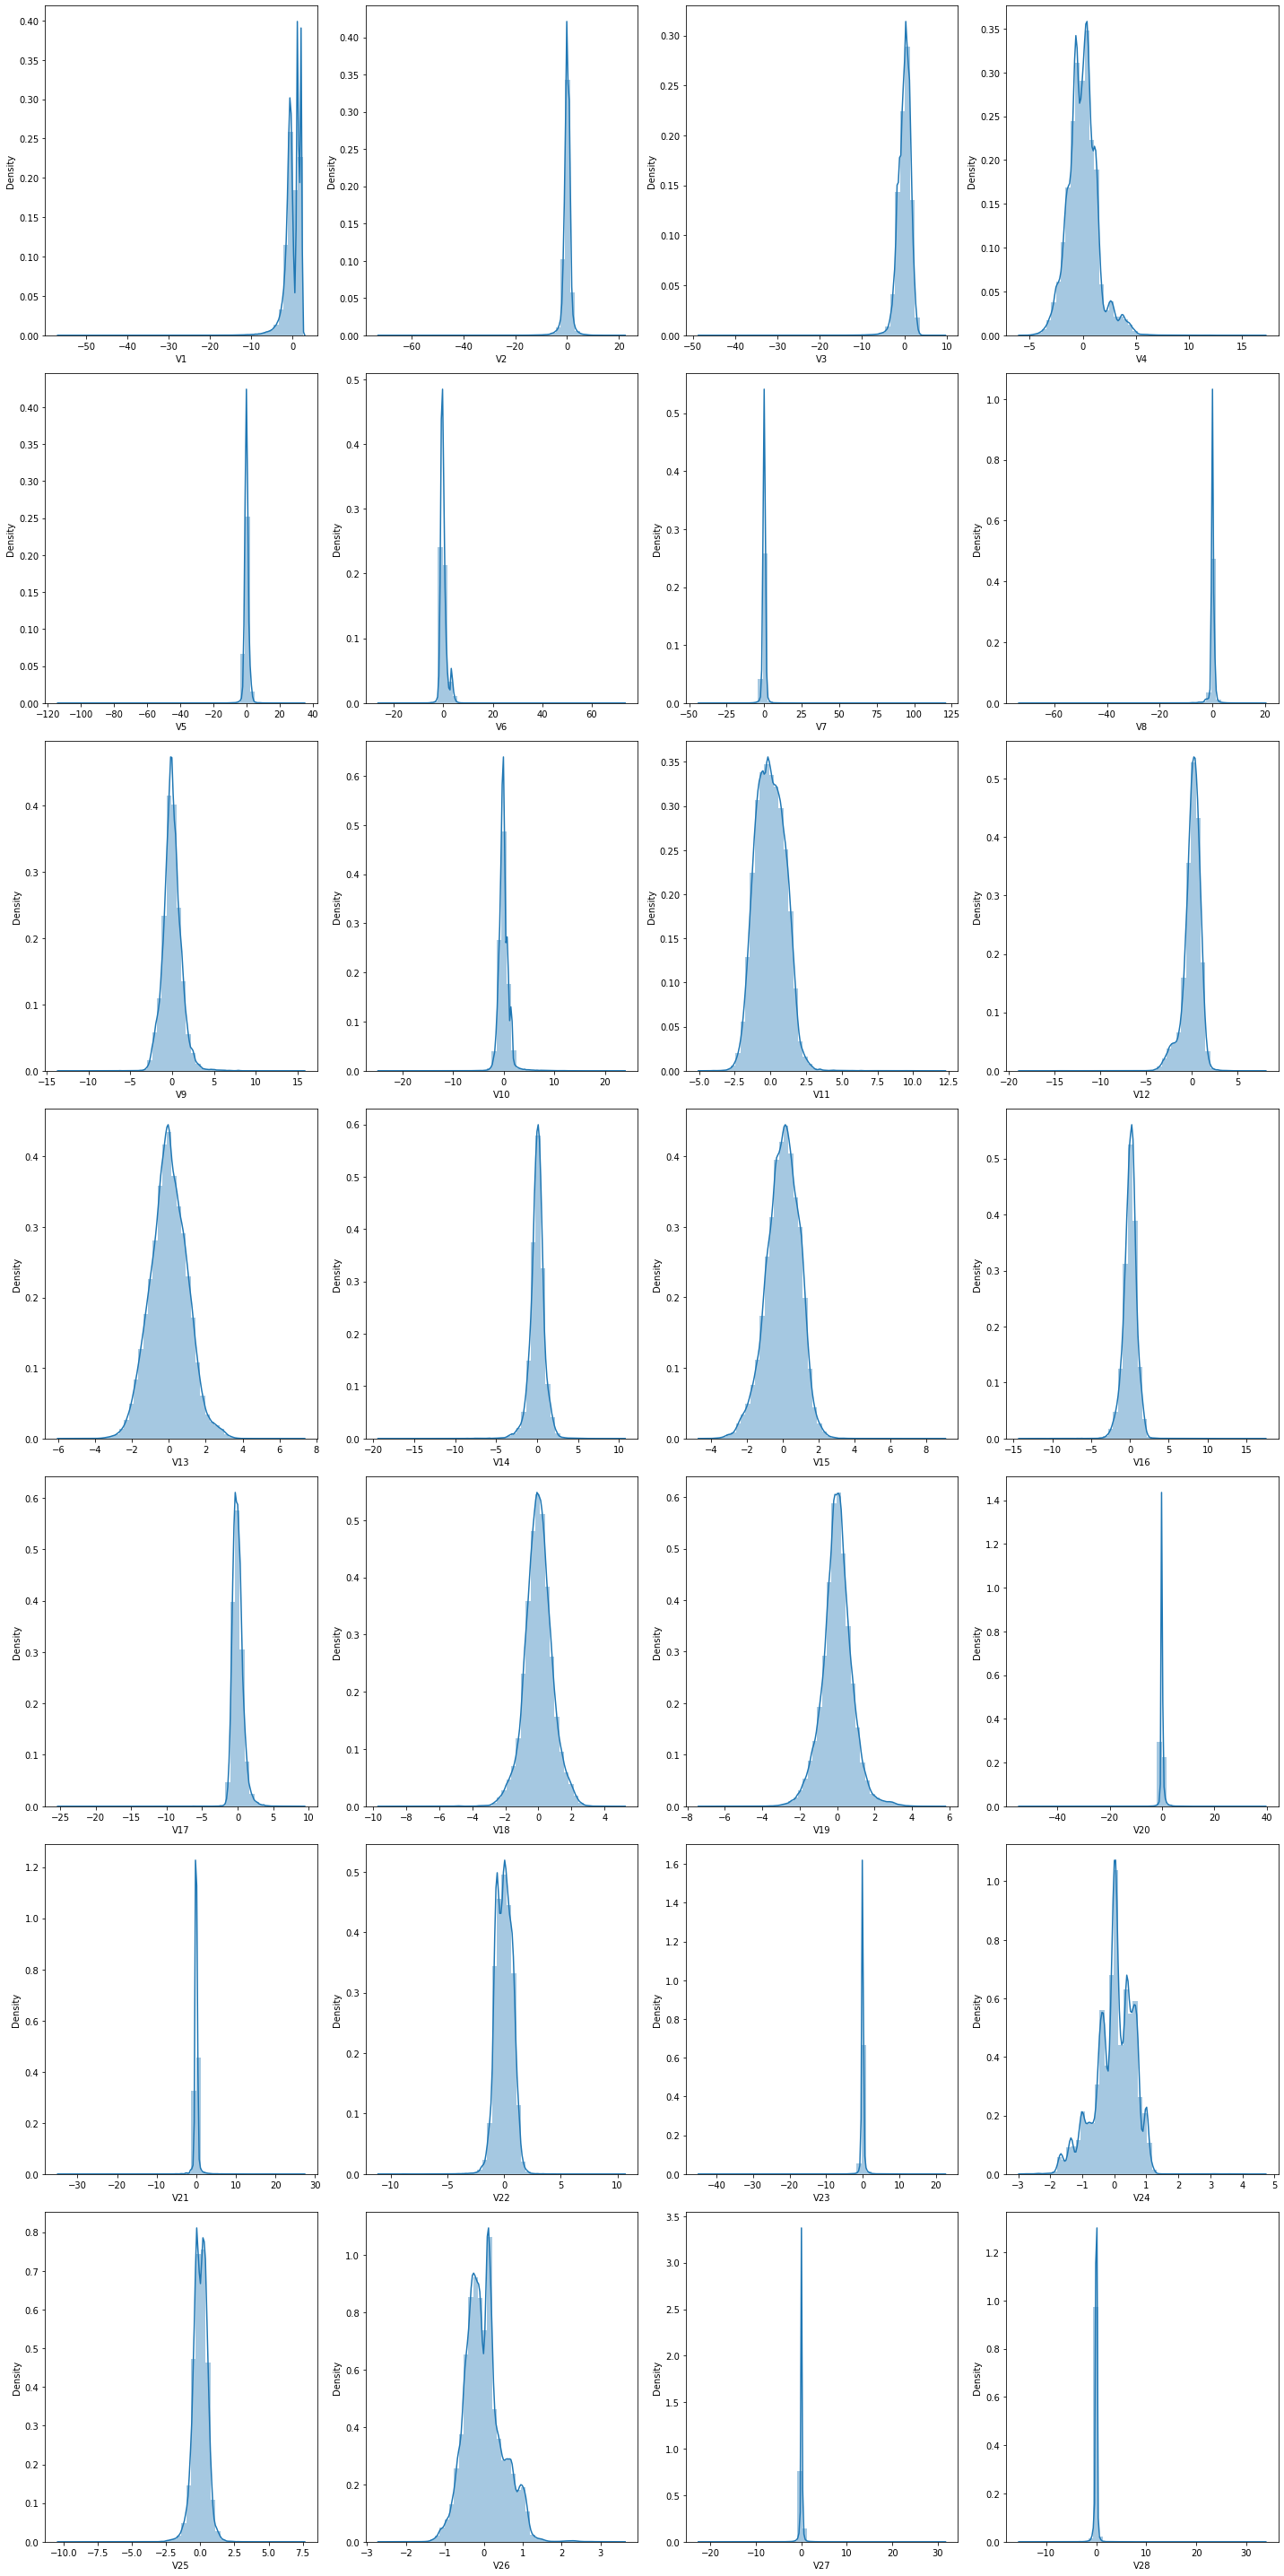

In [ ]:
df_temp=df.drop(columns=['Class','Amount','Time'],axis=1)



fig,ax =plt.subplots(ncols=4,nrows=7,figsize=(20,40))
index=0
ax=ax.flatten()

for col in df_temp.columns:
  sns.distplot(df_temp[col],ax=ax[index])
  index+=1

plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)

## Correlation Matrix

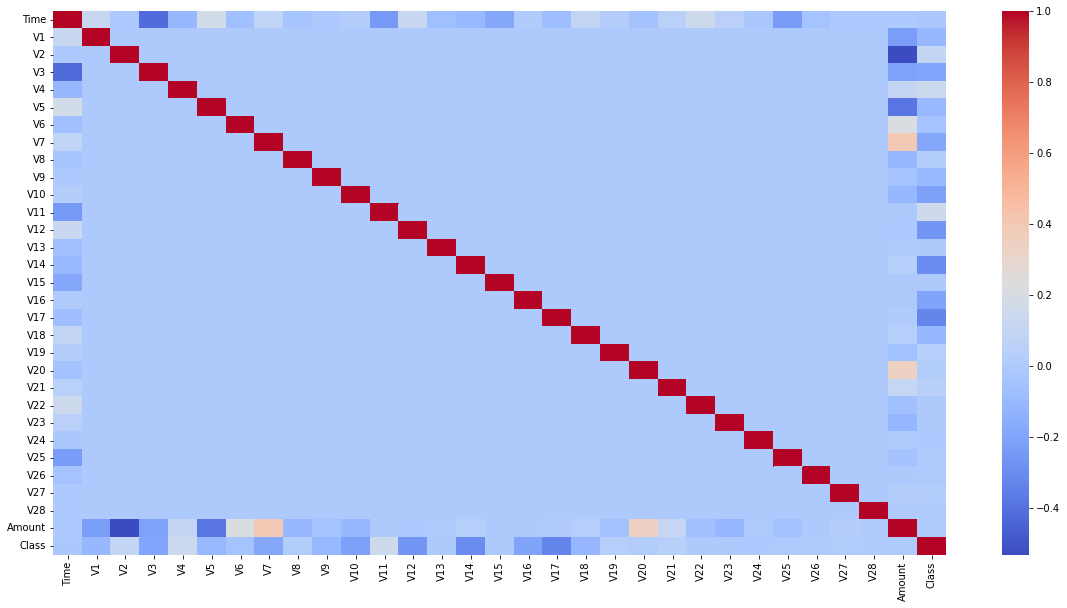

In [ ]:
corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,cmap='coolwarm')

## Input Split

In [ ]:
X=df.drop(columns=['Class'],axis=1)
Y=df['Class']

## Standard Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
le=StandardScaler()
x_scaler=le.fit_transform(X)

In [ ]:
x_scaler

array([[-1.99658302, -0.69424232, -0.04407492, ...,  0.33089162,
        -0.06378115,  0.24496426],
       [-1.99658302,  0.60849633,  0.16117592, ..., -0.02225568,
         0.04460752, -0.34247454],
       [-1.99656197, -0.69350046, -0.81157783, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 1.6419735 ,  0.98002374, -0.18243372, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.26960398,
         0.31668678, -0.31324853],
       [ 1.64205773, -0.27233093, -0.11489898, ..., -0.00598394,
         0.04134999,  0.51435531]])

## Model Training

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_scaler,Y,test_size=0.25,random_state=42,stratify=Y)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,f1_score

model=LogisticRegression()

#Training

model.fit(x_train,y_train)

#Testing
y_pred=model.predict(x_test)

#Report

print(classification_report(y_test,y_pred))
print(f1_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.85      0.63      0.72       123

    accuracy                           1.00     71202
   macro avg       0.92      0.81      0.86     71202
weighted avg       1.00      1.00      1.00     71202

0.719626168224299


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,f1_score

model=RandomForestClassifier()

#Training

model.fit(x_train,y_train)

#Testing
y_pred=model.predict(x_test)

#Report

print(classification_report(y_test,y_pred))
print(f1_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.95      0.76      0.85       123

    accuracy                           1.00     71202
   macro avg       0.97      0.88      0.92     71202
weighted avg       1.00      1.00      1.00     71202

0.846846846846847


## Class Imbalancement

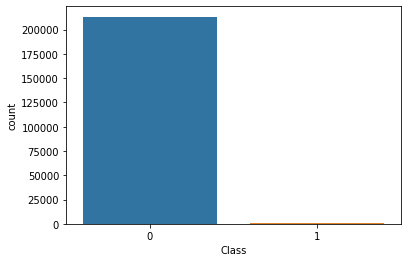

In [ ]:
sns.countplot(y_train)

In [ ]:
#hint-use combination of over sampling and under sampling
#Balance the data with equal distribution

from imblearn.over_sampling import SMOTE
over_sample=SMOTE()
x_smote,y_smote=over_sample.fit_resample(x_train,y_train)

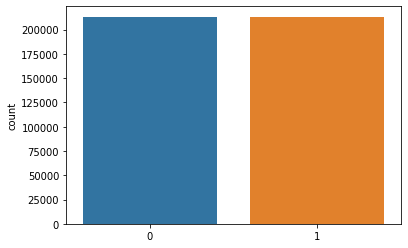

In [ ]:
sns.countplot(y_smote)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,f1_score

model=LogisticRegression()

#Training

model.fit(x_smote,y_smote)

#Testing
y_pred=model.predict(x_test)

#Report

print(classification_report(y_test,y_pred))
print(f1_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.06      0.89      0.11       123

    accuracy                           0.98     71202
   macro avg       0.53      0.94      0.55     71202
weighted avg       1.00      0.98      0.99     71202

0.11264720942140297


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,f1_score

model=RandomForestClassifier()

#Training

model.fit(x_smote,y_smote)

#Testing
y_pred=model.predict(x_test)

#Report

print(classification_report(y_test,y_pred))
print(f1_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.88      0.79      0.83       123

    accuracy                           1.00     71202
   macro avg       0.94      0.89      0.92     71202
weighted avg       1.00      1.00      1.00     71202

0.832618025751073
